<a href="https://colab.research.google.com/github/VidushiSharma31/ML-DL/blob/main/Deep%20Learning/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction using a Neural Network

### Import Libraries
This cell imports the necessary libraries for building and training the neural network, including `numpy`, `matplotlib.pyplot`, `sklearn` modules for datasets, splitting data, scaling, and metrics, and `tensorflow.keras` for building the model.

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load Dataset
This cell loads the breast cancer dataset from `sklearn.datasets`. The dataset includes features and target labels for breast cancer diagnosis.

In [122]:
X, y = datasets.load_breast_cancer(return_X_y=True)

### Split Data
This cell splits the dataset into training and testing sets using `train_test_split` from `sklearn.model_selection`. This is a standard practice to evaluate the model's performance on unseen data.

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale Data
This cell scales the features of the training and testing data using `StandardScaler` from `sklearn.preprocessing`. Scaling helps improve the performance of the neural network by ensuring that all features have a similar range of values.

In [124]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build the Model
This cell defines the neural network model using `tensorflow.keras.models.Sequential`. The model consists of three dense layers with ReLU activation in the hidden layers and a linear activation in the output layer. The `input_dim` is set to 30, corresponding to the number of features in the dataset.

In [125]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile the Model
This cell compiles the model, specifying the loss function (`BinaryCrossentropy` with `from_logits=True`), the optimizer (`Adam` with a learning rate of 1e-3), and the evaluation metric (`accuracy`).

In [126]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])

### Define Early Stopping
This cell defines an `EarlyStopping` callback from `tensorflow.keras.callbacks`. Early stopping is used to prevent overfitting by monitoring the validation loss and stopping the training process when the loss stops improving.

In [127]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### Train the Model
This cell trains the neural network model using the training data. It specifies the number of epochs, batch size, validation split for monitoring during training, and the early stopping callback.

In [128]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop], verbose=1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6839 - loss: 0.6594 - val_accuracy: 0.7826 - val_loss: 0.4895
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7879 - loss: 0.5457 - val_accuracy: 0.8261 - val_loss: 0.4271
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8593 - loss: 0.4699 - val_accuracy: 0.8913 - val_loss: 0.3801
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8968 - loss: 0.4315 - val_accuracy: 0.9130 - val_loss: 0.3429
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9219 - loss: 0.3515 - val_accuracy: 0.9130 - val_loss: 0.3093
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9284 - loss: 0.3274 - val_accuracy: 0.9130 - val_loss: 0.2771
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9506 - loss: 0.2769 - val_accuracy: 0.9130 - val_loss: 0.2490
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9331 - loss: 0.2676 - val_accuracy: 0.9348 - val_loss

### Plot Training History
This cell plots the training and validation accuracy over the epochs. This visualization helps in understanding the model's learning progress and identifying potential overfitting.

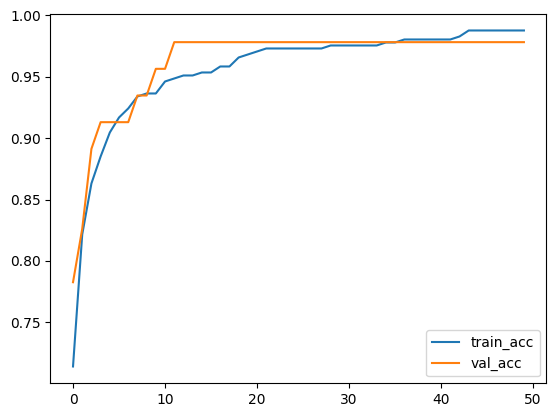

In [129]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

### Evaluate the Model
This cell evaluates the trained model on the test set to assess its performance on unseen data. It prints the test loss and test accuracy.

In [130]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9794 - loss: 0.0658
Test Accuracy: 98.25%


### Make Predictions
This cell uses the trained model to make predictions on the test set. It calculates the predicted probabilities using the sigmoid function and then converts these probabilities into binary class predictions using a threshold of 0.5. It also prints the predicted probabilities and classes for the first few samples, along with the true labels for comparison.

In [131]:
logits = model.predict(X_test)
y_pred = tf.nn.sigmoid(logits)
print("\nPredicted probabilities (first 5 samples):")
print(y_pred.numpy()[:5])

# For binary classification, threshold the sigmoid output at 0.5
y_pred_classes = (y_pred.numpy() > 0.5).astype(int)
print("\nPredicted classes:", y_pred_classes[:5].flatten())
print("True labels:      ", y_test[:5])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Predicted probabilities (first 5 samples):
[[9.2039782e-01]
 [5.1192794e-04]
 [4.1253744e-03]
 [9.9901062e-01]
 [9.9988407e-01]]

Predicted classes: [1 0 0 1 1]
True labels:       [1 0 0 1 1]


### Confusion Matrix
This cell calculates and prints the confusion matrix, which provides a detailed breakdown of the model's performance on the test set, showing the number of true positives, true negatives, false positives, and false negatives.

In [132]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[42  1]
 [ 0 71]]
